# **Memoria EDA.**

## **Codigo: Imports, diccionario y función.**

Imports de las librerias utilizadas:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Diccionario Comunidades autonomas:

In [136]:
# Diccionario Comunidades autonomas.
comunidades_autonomas = {
    'Total Nacional': [],
    'País Vasco': [],
    'Comunidad de Madrid': [],
    'Ceuta': [],
    'Comunidad Foral de Navarra': [],
    'Cataluña': [],
    'Melilla': [],
    'Total Nacional': [],
    'Principado de Asturias': [],
    'Aragón': [],
    'Cantabria': [],
    'Illes Balears': [],
    'La Rioja': [],
    'Castilla y León': [],
    'Comunitat Valenciana': [],
    'Galicia': [],
    'Región de Murcia': [],
    'Castilla - La Mancha': [],
    'Andalucía': [],
    'Canarias': [],
    'Extremadura': []
}

Función para guardar las posiciones en el diccionario:

In [137]:
# FUNCIÓN PARA GUARDAR PUNTUACIONES EN EL DICCIONARIO.
def guardar_puntuacion(df):
    for i, fila in enumerate(df.iterrows()):
        fila = re.sub(r' +', ' ', fila[1]["Comunidades y Ciudades Autónomas"])
        comunidades_autonomas[fila].append(i + 1)

## **Situación laboral.**

### Salario.

In [138]:
# Salario medio en España por Comunidades Autonomas. Datos INE.
# Salario bruto anual.

df_salario = pd.read_csv("data/salario_edad_sexo.csv", sep=";")
df_salario = df_salario[df_salario["Edad del trabajador"] == "Todas las edades"]
df_salario = df_salario[df_salario["Sexo"] == "Ambos sexos"]
df_salario = df_salario[df_salario["Periodo"] == 2021]
df_salario.reset_index(inplace=True)
# Limpio los Strings de las comunidades.
df_salario['Comunidades y Ciudades Autónomas'] = df_salario['Comunidades y Ciudades Autónomas'].str.replace('^(.*), (.*)$', r'\2 \1', regex=True)
# Formateo y cambio el tipo de los datos de la columna Total.
df_salario["Total"] = df_salario["Total"].str.replace('.', '')
df_salario["Total"] = df_salario["Total"].str.replace(',', '.')
df_salario["Total"] = pd.to_numeric(df_salario["Total"], errors='coerce')
# Ordeno los resultados
df_salario = df_salario.sort_values(by="Total", ascending=False)
# Guardo la puntuación en el diccionario.
guardar_puntuacion(df_salario)
df_salario

,index,Comunidades y Ciudades Autónomas,Edad del trabajador,Sexo,Periodo,Total
16,4032,País Vasco,Todas las edades,Ambos sexos,2021,31063.68
13,3276,Comunidad de Madrid,Todas las edades,Ambos sexos,2021,29512.58
18,4536,Ceuta,Todas las edades,Ambos sexos,2021,28628.08
15,3780,Comunidad Foral de Navarra,Todas las edades,Ambos sexos,2021,28459.37
9,2268,Cataluña,Todas las edades,Ambos sexos,2021,28145.02
19,4537,Melilla,Todas las edades,Ambos sexos,2021,27987.96
0,0,Total Nacional,Todas las edades,Ambos sexos,2021,25896.82
3,756,Principado de Asturias,Todas las edades,Ambos sexos,2021,25046.60
2,504,Aragón,Todas las edades,Ambos sexos,2021,25011.55
6,1512,Cantabria,Todas las edades,Ambos sexos,2021,24470.70


C:\Users\diego\AppData\Local\Temp\ipykernel_16648\3640457574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_salario, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_salario["Comunidades y Ciudades Autónomas"]])


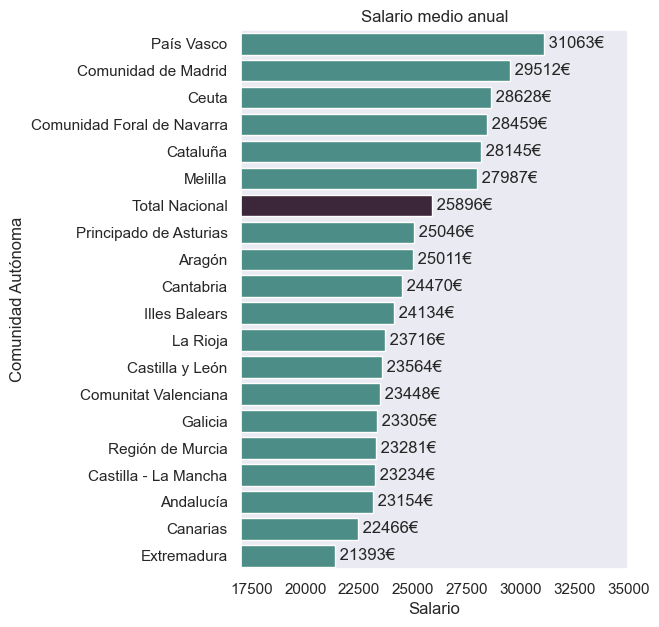

In [135]:
sns.set(rc={"figure.figsize": (5, 7)})
#sns.set_style("white")
# Crear el gráfico de barras horizontales
ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_salario, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_salario["Comunidades y Ciudades Autónomas"]])

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Personalizar el gráfico
plt.xlabel("Salario")
plt.ylabel("Comunidad Autónoma")
plt.title("Salario medio anual")
plt.xlim(17000, 35000)

for bar in ax.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, " " + f"{int(width)}"+ "€", ha='left', va='center')

### Tasa de paro.

Grafica que muestra el porcentaje de población en paro de la comunidad.

In [140]:
# Tasa de paro por comunidades. Fuente INE 2023 t2
# Representa el porcentaje de paro de la comunidad.
df_paro = pd.read_csv('data/tasa_paro.csv', sep=";")
df_paro = df_paro[df_paro["Periodo"] == "2023T2"]
# Limpio los Strings de las comunidades.
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_paro["Comunidades y Ciudades Autónomas"] = df_paro["Comunidades y Ciudades Autónomas"].str.strip()
df_paro["Total"] = df_paro["Total"].str.replace(',', '.', regex=True).astype(float)
# Ordeno los resultados.
df_paro = df_paro.sort_values(by="Total", ascending=True)
# Guardo la puntuación en el diccionario.
guardar_puntuacion(df_paro)
df_paro

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
32,Ambos sexos,País Vasco,Total,2023T2,7.13
8,Ambos sexos,Illes Balears,Total,2023T2,7.15
34,Ambos sexos,La Rioja,Total,2023T2,7.46
12,Ambos sexos,Cantabria,Total,2023T2,8.12
18,Ambos sexos,Cataluña,Total,2023T2,8.44
4,Ambos sexos,Aragón,Total,2023T2,8.59
30,Ambos sexos,Comunidad Foral de Navarra,Total,2023T2,8.79
14,Ambos sexos,Castilla y León,Total,2023T2,9.06
26,Ambos sexos,Comunidad de Madrid,Total,2023T2,9.56
24,Ambos sexos,Galicia,Total,2023T2,9.58


C:\Users\diego\AppData\Local\Temp\ipykernel_16648\103948540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_paro, palette=["#42988f" if c != "Total Nacional" else "#40223c" for c in df_paro["Comunidades y Ciudades Autónomas"]])


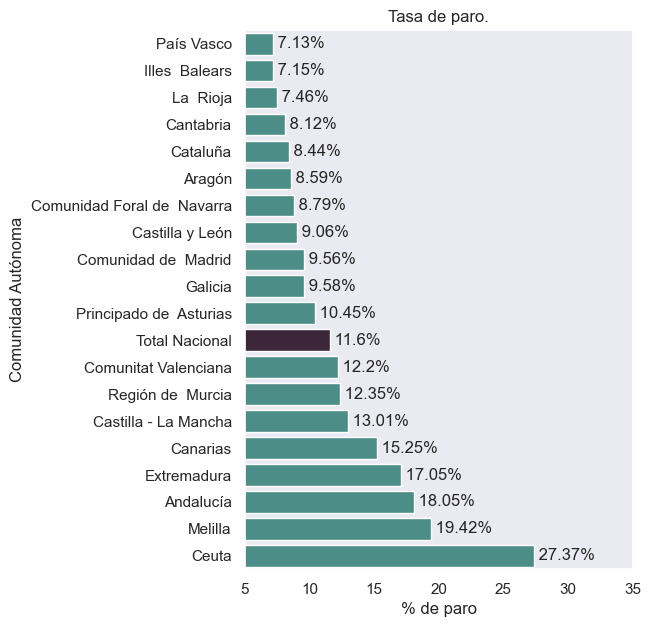

In [142]:
# Creo el grafico de barras con la tasa de paro de cada Comunidad Autonoma.
sns.set(rc={"figure.figsize": (5, 7)})

# Crear el gráfico de barras horizontales
ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_paro, palette=["#42988f" if c != "Total Nacional" else "#40223c" for c in df_paro["Comunidades y Ciudades Autónomas"]])

#"#42988f"
#"#40223c"
ax.xaxis.grid(False)
ax.yaxis.grid(False)

#plt.bar(6, df_salario["Comunidades y Ciudades Autónomas"][6], color='red');
plt.xlabel("% de paro");
plt.ylabel("Comunidad Autónoma");
plt.title("Tasa de paro.");

plt.xlim(5, 35)

for bar in ax.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, " " + f"{float(width)}" + "%", ha='left', va='center')

## **Vivienda.**

### IPV de la vivienda.
El IPV es el Indice del Precio de la Vivienda. Tiene como objetivo la medición de la evolución de los precios de compraventa de las viviendas de precio libre, tanto nuevas como de segunda mano, a lo largo del tiempo.

Cuanto mas alto es el IPV mas valor tienen las viviendas en esa comunidad.

In [143]:
# IPV de la vivienda por Comunidades Autonomas. Datos INE.
# valor IPV.

df_ipv = pd.read_csv("data/IPV_vivienda_CCAA.csv", sep=";")
df_ipv = df_ipv[df_ipv["Índices y tasas"] == "Índice"]
df_ipv = df_ipv[df_ipv["General, vivienda nueva y de segunda mano"] == "General"]
df_ipv = df_ipv[df_ipv["Periodo"] == "2023T2"]
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].fillna("Total Nacional")
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_ipv["Total"] = df_ipv["Total"].str.replace(',', '.')
df_ipv["Comunidades y Ciudades Autónomas"] = df_ipv["Comunidades y Ciudades Autónomas"].str.strip()

df_ipv = df_ipv.sort_values(by="Total", ascending=True)
df_ipv["Total"] = pd.to_numeric(df_ipv["Total"], errors='coerce')

guardar_puntuacion(df_ipv)
df_ipv

,Total Nacional,Comunidades y Ciudades Autónomas,"General, vivienda nueva y de segunda mano",Índices y tasas,Periodo,Total
8712,Nacional,Extremadura,General,Índice,2023T2,116.912
6336,Nacional,Castilla - La Mancha,General,Índice,2023T2,120.939
5544,Nacional,Castilla y León,General,Índice,2023T2,129.698
2376,Nacional,Principado de Asturias,General,Índice,2023T2,130.306
11880,Nacional,Comunidad Foral de Navarra,General,Índice,2023T2,131.585
9504,Nacional,Galicia,General,Índice,2023T2,132.073
11088,Nacional,Región de Murcia,General,Índice,2023T2,132.087
13464,Nacional,La Rioja,General,Índice,2023T2,133.325
7920,Nacional,Comunitat Valenciana,General,Índice,2023T2,135.280
12672,Nacional,País Vasco,General,Índice,2023T2,135.331


In [144]:
print(comunidades_autonomas)

{'Total Nacional': [7, 12, 15], 'País Vasco': [1, 1, 10], 'Comunidad de Madrid': [2, 9, 20], 'Ceuta': [3, 20, 18], 'Comunidad Foral de Navarra': [4, 7, 5], 'Cataluña': [5, 5, 16], 'Melilla': [6, 19, 17], 'Principado de Asturias': [8, 11, 4], 'Aragón': [9, 6, 11], 'Cantabria': [10, 4, 12], 'Illes Balears': [11, 2, 19], 'La Rioja': [12, 3, 8], 'Castilla y León': [13, 8, 3], 'Comunitat Valenciana': [14, 13, 9], 'Galicia': [15, 10, 6], 'Región de Murcia': [16, 14, 7], 'Castilla - La Mancha': [17, 15, 2], 'Andalucía': [18, 18, 13], 'Canarias': [19, 16, 14], 'Extremadura': [20, 17, 1]}


C:\Users\diego\AppData\Local\Temp\ipykernel_16648\1962631252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_ipv, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_ipv["Comunidades y Ciudades Autónomas"]])


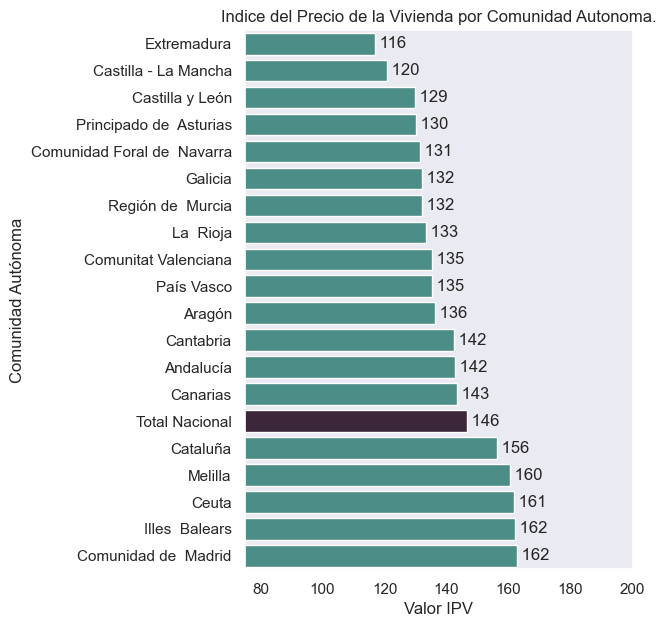

In [145]:
sns.set(rc={"figure.figsize": (5, 7)})
ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_ipv, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_ipv["Comunidades y Ciudades Autónomas"]])

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Valor IPV")
plt.ylabel("Comunidad Autónoma")
plt.title("Indice del Precio de la Vivienda por Comunidad Autonoma.")
plt.xlim(75, 200)

for bar in ax.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, " " + f'{int(width)}', ha='left', va='center')


## **Gastos.**

In [146]:
# Gasto medio en España por Comunidades Autonomas. Datos INE.
# Indice general = Alimentos, bebidas, tabaco, ropa, vivienda, conbustibles, sanidad, transporte, mantenimiento del hogar, comunicaciones, ocio y cultura, enseñanza.

"""
Datos filtrados:
    - De la columna "Índices y tasasr" he filtrado para mostrar unicamente el indice general.
    - De la columna "General, vivienda nueva y de segunda mano" he filtrado para mostrar unicamente el IPV generales.
    - De la columna "Periodo" he filtrado para mostrar unicamente los datos del ultimo trimestre registrado de 2023.
"""

df_gastos = pd.read_csv("data/gastos_medios.csv", sep=";")
df_gastos = df_gastos[df_gastos["Comunidades y Ciudades Autónomas"] != "Total Nacional"]
df_gastos = df_gastos[df_gastos["Periodo"] == 2022]
df_gastos = df_gastos[df_gastos["Grupos de gasto (2 dígitos)"] == "Índice general"]
df_gastos = df_gastos[df_gastos["Gastos totales, medios y distribución porcentual"] == "Gasto medio por persona"]
df_gastos = df_gastos[df_gastos["Tipo de dato"] == "Dato base"]


df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.replace("^(.*), (.*)$", r'\2 \1', regex=True)
df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.replace(r'\d+', '', regex=True)
df_gastos["Comunidades y Ciudades Autónomas"] = df_gastos["Comunidades y Ciudades Autónomas"].str.strip()

df_gastos["Total"] = df_gastos["Total"].str.replace('.', '')
df_gastos["Total"] = df_gastos["Total"].str.replace(',', '.')


df_gastos["Total"] = pd.to_numeric(df_gastos["Total"], errors='coerce')

df_gastos = df_gastos.sort_values(by="Total", ascending=True)
guardar_puntuacion(df_gastos)
df_gastos

,Comunidades y Ciudades Autónomas,Tipo de dato,"Gastos totales, medios y distribución porcentual",Grupos de gasto (2 dígitos),Periodo,Total
63648,Melilla,Dato base,Gasto medio por persona,Índice general,2022,10145.97
17238,Canarias,Dato base,Gasto medio por persona,Índice general,2022,10697.57
27183,Castilla - La Mancha,Dato base,Gasto medio por persona,Índice general,2022,10959.46
37128,Extremadura,Dato base,Gasto medio por persona,Índice general,2022,11134.48
60333,Ceuta,Dato base,Gasto medio por persona,Índice general,2022,11407.33
3978,Andalucía,Dato base,Gasto medio por persona,Índice general,2022,11530.71
47073,Región de Murcia,Dato base,Gasto medio por persona,Índice general,2022,11662.38
20553,Cantabria,Dato base,Gasto medio por persona,Índice general,2022,12278.11
33813,Comunitat Valenciana,Dato base,Gasto medio por persona,Índice general,2022,12292.13
57018,La Rioja,Dato base,Gasto medio por persona,Índice general,2022,12471.97


In [147]:
print(comunidades_autonomas)

{'Total Nacional': [7, 12, 15, 11], 'País Vasco': [1, 1, 10, 20], 'Comunidad de Madrid': [2, 9, 20, 19], 'Ceuta': [3, 20, 18, 5], 'Comunidad Foral de Navarra': [4, 7, 5, 18], 'Cataluña': [5, 5, 16, 16], 'Melilla': [6, 19, 17, 1], 'Principado de Asturias': [8, 11, 4, 15], 'Aragón': [9, 6, 11, 14], 'Cantabria': [10, 4, 12, 8], 'Illes Balears': [11, 2, 19, 17], 'La Rioja': [12, 3, 8, 10], 'Castilla y León': [13, 8, 3, 13], 'Comunitat Valenciana': [14, 13, 9, 9], 'Galicia': [15, 10, 6, 12], 'Región de Murcia': [16, 14, 7, 7], 'Castilla - La Mancha': [17, 15, 2, 3], 'Andalucía': [18, 18, 13, 6], 'Canarias': [19, 16, 14, 2], 'Extremadura': [20, 17, 1, 4]}


C:\Users\diego\AppData\Local\Temp\ipykernel_16648\3956728145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_gastos, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_gastos["Comunidades y Ciudades Autónomas"]])


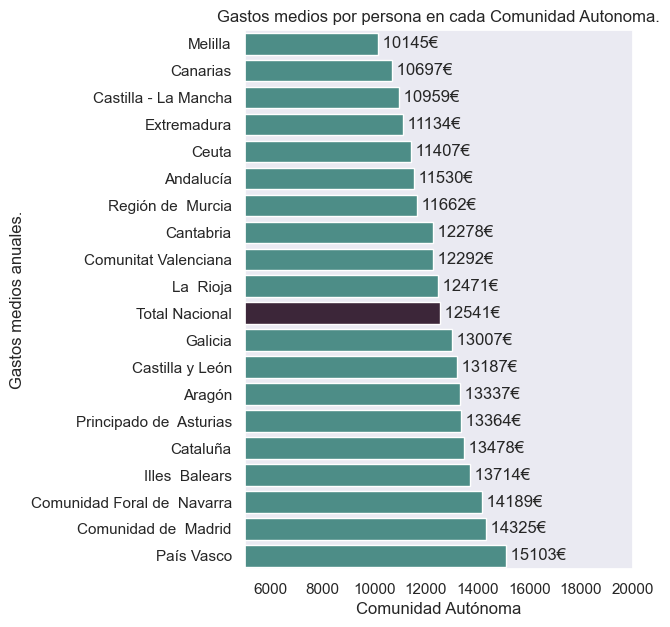

In [148]:
sns.set(rc={"figure.figsize": (5, 7)})
ax = sns.barplot(x="Total", y="Comunidades y Ciudades Autónomas", data=df_gastos, palette = ["#42988f" if x != "Total Nacional" else "#40223c" for x in df_gastos["Comunidades y Ciudades Autónomas"]])

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Comunidad Autónoma")
plt.ylabel("Gastos medios anuales.")
plt.title("Gastos medios por persona en cada Comunidad Autonoma.")
plt.xlim(5000, 20000)

for bar in ax.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, " " + f"{int(width)}" + "€", ha='left', va='center')

In [149]:
print(comunidades_autonomas)

{'Total Nacional': [7, 12, 15, 11], 'País Vasco': [1, 1, 10, 20], 'Comunidad de Madrid': [2, 9, 20, 19], 'Ceuta': [3, 20, 18, 5], 'Comunidad Foral de Navarra': [4, 7, 5, 18], 'Cataluña': [5, 5, 16, 16], 'Melilla': [6, 19, 17, 1], 'Principado de Asturias': [8, 11, 4, 15], 'Aragón': [9, 6, 11, 14], 'Cantabria': [10, 4, 12, 8], 'Illes Balears': [11, 2, 19, 17], 'La Rioja': [12, 3, 8, 10], 'Castilla y León': [13, 8, 3, 13], 'Comunitat Valenciana': [14, 13, 9, 9], 'Galicia': [15, 10, 6, 12], 'Región de Murcia': [16, 14, 7, 7], 'Castilla - La Mancha': [17, 15, 2, 3], 'Andalucía': [18, 18, 13, 6], 'Canarias': [19, 16, 14, 2], 'Extremadura': [20, 17, 1, 4]}


# **Hipotesis:**

- **Diferencia en salario medio anual:** Una diferencia de 10.000€ entre el primer y el último puesto en salario medio anual indica una brecha significativa en los ingresos entre las regiones.

- **Crecimiento exponencial del desempleo:** El hecho de que el porcentaje de desempleo crezca exponencialmente en los últimos puestos de la tabla señala la necesidad de abordar la falta de oportunidades de empleo en algunas regiones. Esto puede requerir enfoques específicos para estimular el empleo y la inversión en áreas menos favorecidas.

- **Diferencia en el IPV:** una diferencia del 40% en el IPV entre la primera y la última Comunidad Autónoma indica dificultades en términos de accesibilidad a la vivienda. 

- **Diferencia en gastos mensuales:** La comunidad que gasta un 50% más que la primera en gastos mensuales indica diferencias en los costos de vida y en los patrones de gasto. Esto también puede requerir políticas específicas para abordar las diferencias en los costos de vida.

### Ver si la calidad de vida cambia mucho dependiendo de la comunidad o es similar a nivel nacional.

Segun la posición de cada comunidad en cada grafica, se calcula la media para representar la puntuación final.

Cuantos menos puntos tiene una comunidad mejor.

In [150]:
df_total = pd.DataFrame(comunidades_autonomas)
df_total

,Total Nacional,País Vasco,Comunidad de Madrid,Ceuta,Comunidad Foral de Navarra,Cataluña,Melilla,Principado de Asturias,Aragón,Cantabria,Illes Balears,La Rioja,Castilla y León,Comunitat Valenciana,Galicia,Región de Murcia,Castilla - La Mancha,Andalucía,Canarias,Extremadura
0,7,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20
1,12,1,9,20,7,5,19,11,6,4,2,3,8,13,10,14,15,18,16,17
2,15,10,20,18,5,16,17,4,11,12,19,8,3,9,6,7,2,13,14,1
3,11,20,19,5,18,16,1,15,14,8,17,10,13,9,12,7,3,6,2,4


C:\Users\diego\AppData\Local\Temp\ipykernel_16648\649466779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Comunidades y Ciudades Autónomas", y = df_medias.index, data = df_medias, palette = ["#42988f" if i != "Total Nacional" else "#40223c" for i, row in df_medias.iterrows()])


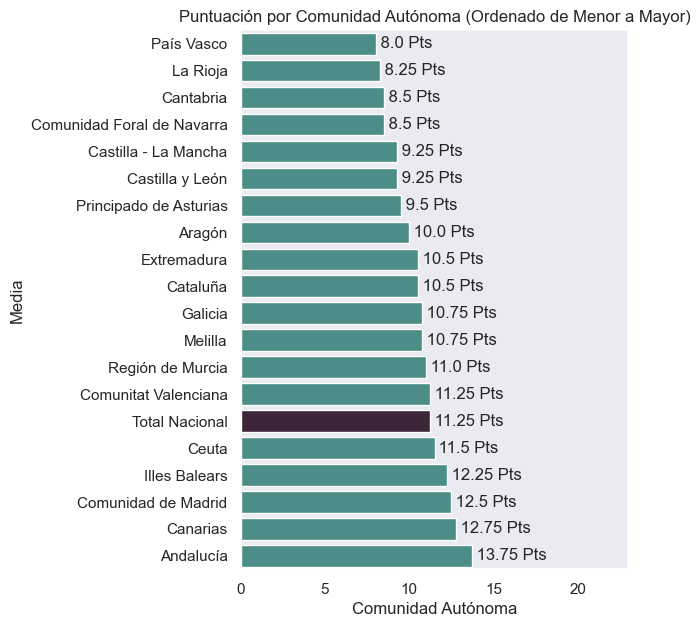

In [152]:
medias = df_total.mean()
df_medias = pd.DataFrame(medias.sort_values(ascending=True))
df_medias = df_medias.rename(columns={0: "Comunidades y Ciudades Autónomas"})

plt.figure(figsize=(5, 7))
ax = sns.barplot(x = "Comunidades y Ciudades Autónomas", y = df_medias.index, data = df_medias, palette = ["#42988f" if i != "Total Nacional" else "#40223c" for i, row in df_medias.iterrows()])

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.title('Puntuación por Comunidad Autónoma (Ordenado de Menor a Mayor)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Media')
plt.xlim(0, 23)

for bar in ax.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, " " + f"{float(width)}" + " Pts", ha='left', va='center')

La disparidad en las puntuaciones entre las Comunidades Autónomas indica que la calidad de vida y el bienestar pueden variar considerablemente de una región a otra. 

La media nacional, que se encuentra en la decimoquinta posición en el ranking, no refleja adecuadamente las condiciones y necesidades de todas las partes del país. Esto sugiere que una política basada únicamente en la media nacional podría no ser efectivo para abordar las diferencias regionales.

La brecha entre la puntuación de la primera Comunidad Autónoma y la última es considerable, lo que destaca la necesidad de abordar desigualdades regionales para mejorar la equidad y la calidad de vida en todo el país.

### La relación entre el PIB per cápita de cada comunidad y la calidad de vida de sus ciudadanos.

In [160]:
df_pib = pd.read_csv("data/pib.csv", sep=";")
df_merged = pd.merge(df_pib, df_salario, on="Comunidades y Ciudades Autónomas")
df_merged

,index_x,Comunidades y Ciudades Autónomas,Año,Total_x,index_y,Edad del trabajador,Sexo,Periodo,Total_y
0,1,Andalucía,2021,18906,252,Todas las edades,Ambos sexos,2021,23154.99
1,2,Aragón,2021,28912,504,Todas las edades,Ambos sexos,2021,25011.55
2,3,Principado de Asturias,2021,23235,756,Todas las edades,Ambos sexos,2021,25046.60
3,4,Illes Balears,2021,24866,1008,Todas las edades,Ambos sexos,2021,24134.73
4,5,Canarias,2021,18990,1260,Todas las edades,Ambos sexos,2021,22466.23
5,6,Cantabria,2021,23730,1512,Todas las edades,Ambos sexos,2021,24470.70
6,7,Castilla y León,2021,24428,1764,Todas las edades,Ambos sexos,2021,23564.33
7,8,Castilla - La Mancha,2021,20655,2016,Todas las edades,Ambos sexos,2021,23234.55
8,9,Cataluña,2021,29942,2268,Todas las edades,Ambos sexos,2021,28145.02
9,10,Comunitat Valenciana,2021,22289,2520,Todas las edades,Ambos sexos,2021,23448.29


Text(0.5, 1.0, 'Comparación PIB y salario medio.')

<Figure size 1000x600 with 0 Axes>

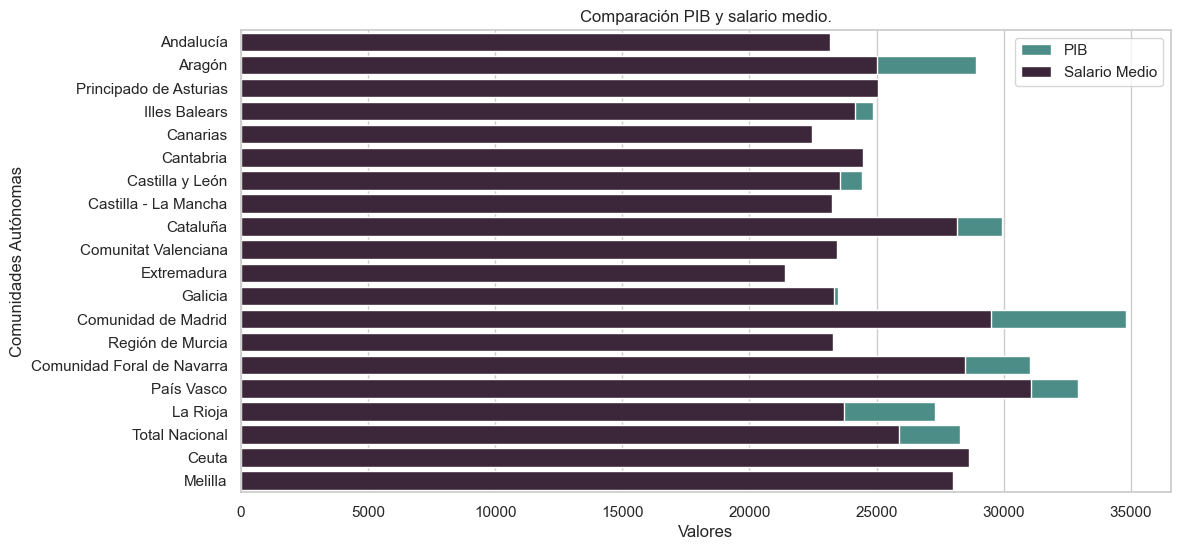

In [184]:
df_merged = pd.merge(df_pib, df_salario, on="Comunidades y Ciudades Autónomas")
plt.figure(figsize=(10, 6))
# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= "Total_x", y= "Comunidades y Ciudades Autónomas", data = df_merged, color="#42988f", label= "PIB")
ax = sns.barplot(x ="Total_y", y= "Comunidades y Ciudades Autónomas", data = df_merged, color="#40223c", label="Salario Medio")

# Personaliza el gráfico
plt.xlabel("Valores")
plt.ylabel("Comunidades Autónomas")
plt.legend()
plt.title("Comparación PIB y salario medio.")


La observación de que solo 10 comunidades autónomas tienen un salario medio anual mayor que el Producto Interno Bruto (PIB) de esa comunidad sugiere una serie de dinámicas económicas y sociales. Se plantean varias hipótesis para abordar esta observación:

- Desigualdad de ingresos: En las comunidades donde el salario medio es menor que el PIB, existe una mayor desigualdad en la distribución de ingresos. Esta hipótesis sugiere que una minoría de la población gana significativamente más que la mayoría.

- Dependencia en el sector público: Las comunidades con un PIB mayor que el salario medio pueden depender en gran medida del sector público para su actividad económica.

- Diferencias sectoriales: Ciertos sectores, como el turismo o la tecnología, pueden contribuir de manera desproporcionada al PIB sin necesariamente aumentar los salarios promedio.

- Costo de vida y nivel de precios: Las disparidades en el costo de vida y los niveles de precios pueden influir en la relación entre el salario medio y el PIB. Esta hipótesis plantea que en áreas con costos de vida más altos, los salarios pueden ser más altos para compensar, aunque esto no necesariamente refleje una mejor calidad de vida.

- Políticas económicas y laborales: Las diferencias en las políticas económicas y laborales, como los salarios mínimos, los impuestos y las regulaciones laborales, también pueden influir en la relación entre el salario medio y el PIB. Esta hipótesis sugiere que las políticas gubernamentales pueden tener un impacto significativo en la distribución de ingresos y la actividad económica.